<div style="display: inline-block;">
    <img src="images/nhsa_logo.png" alt="Image" style="text-align: left;">
</div>

# Parent Gauge Data Analysis Project

## TABLE OF CONTENTS
- to be filled later
- to be filled later
- to be filled later

---
## Data Cleaning Analysis

Welcome to the Data Cleaning Analysis Report! This report aims to provide a clear understanding of the data cleaning process without delving into complex technical details. Our primary goal is to identify and highlight areas in the dataset that require cleaning, without performing any data manipulation or alteration of the dataset.

Throughout this report, we will examine the dataset and identify potential issues or inconsistencies that may impact the reliability and accuracy of the data. By thoroughly assessing the data quality, we can ensure that our analyses and subsequent decision-making processes are based on a solid foundation.

By the end of this report, you will have a comprehensive overview of the data cleaning requirements, enabling you to make informed decisions about the necessary steps to enhance the overall quality of our dataset.

Let's dive in and explore what areas require attention in the data cleaning process.

In [98]:
# Start with the necessary imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from rich.console import Console
from rich.table import Table
from rich.text import Text

pd.set_option('display.max_rows', None)  # Display all rows
pd.set_option('display.max_columns', None)  # Display all columns

In [5]:
#Load the Data into the dataframe
df = pd.read_excel('../data/INTVDATA.xlsx', sheet_name ='Main', engine ='openpyxl')

#Copy existing dataframe to .csv file
df.to_csv('../data/intv_data.csv', index=False)

#read the new .csv file
df = pd.read_csv('../data/intv_data.csv')

/var/folders/vw/1sthm_ts1dj_1hqg1xnsz19w0000gn/T/ipykernel_9289/813791575.py:8: DtypeWarning: Columns (16,18,27,35,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,92) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../data/intv_data.csv')


## DESCRIPTIVE ANALYSIS

Before we dive into the data cleaning process, it is essential to conduct a descriptive analysis to gain a comprehensive understanding of the dataset we are working with. Descriptive analysis involves summarizing and exploring the key characteristics, distributions, and patterns present in the data.

Through this analysis, we aim to answer questions such as:

- What are the variables included in the dataset?
- What are the data types of each variable?
- What is the overall size and structure of the dataset?
- What are the summary statistics for numerical variables?
- What are the frequency distributions for categorical variables?
- By examining these aspects, we can establish a baseline understanding of the dataset, which will serve as a reference point for identifying and addressing data quality issues during the cleaning process.

Let's proceed with the descriptive analysis to gain insights into the dataset's composition and characteristics, enabling us to make informed decisions regarding the data cleaning and preparation steps.

In [6]:
#describe
df.describe()

,Unnamed: 0.1,Unnamed: 0
count,204879.000000,204675.000000
mean,102439.000000,498.938033
std,59143.617238,288.536104
min,0.000000,0.000000
25%,51219.500000,249.000000
50%,102439.000000,499.000000
75%,153658.500000,749.000000
max,204878.000000,999.000000


## MISSING VALUE ANALYSIS

In this section, we focus on analyzing missing values within our dataset. Missing values refer to any instance where data is not recorded or unavailable for specific variables. Identifying and addressing missing values is crucial as they can introduce bias and affect the integrity of our analyses.

Through careful examination, we will investigate the extent and patterns of missing values in our dataset. This analysis will help us understand the potential impact of missing data on our results and allow us to devise appropriate strategies for handling them.

By addressing missing values effectively, we aim to enhance the reliability and completeness of our dataset, enabling us to draw more accurate conclusions and make informed decisions based on the data.

Let's proceed with our missing value analysis to uncover valuable insights and formulate a plan for handling missing data appropriately.

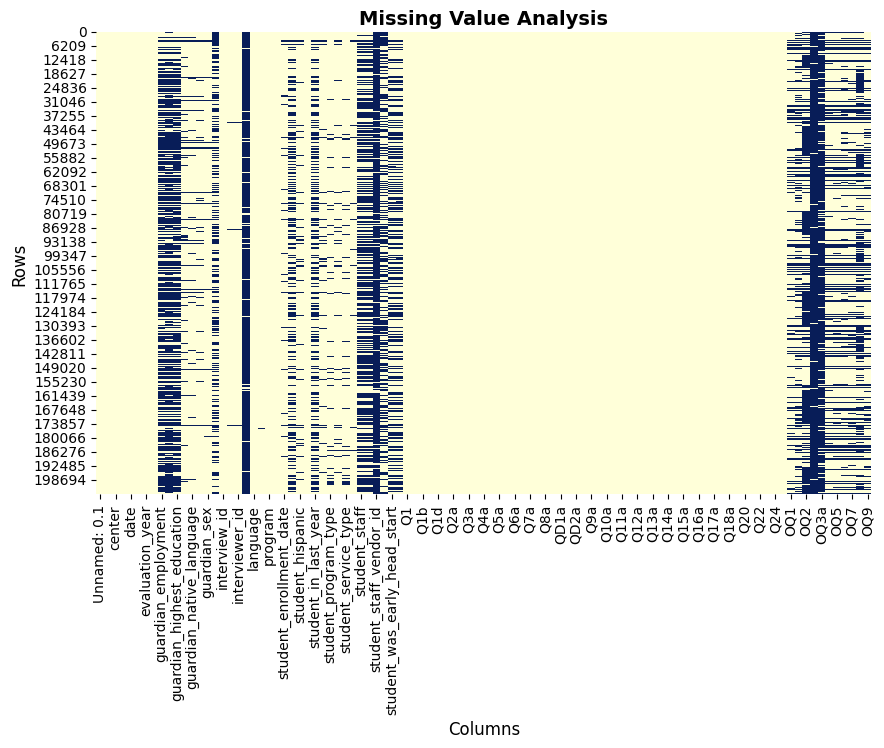

In [112]:
# Create a missing value mask
missing_mask = df.isnull()

# Plot the missing value heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(missing_mask, cmap='YlGnBu', cbar=False)

# Set the plot title and labels
plt.title('Missing Value Analysis', fontsize=14, fontweight='bold')
plt.xlabel('Columns', fontsize=12)
plt.ylabel('Rows', fontsize=12)

# Show the plot
plt.show()

In [68]:
# Define the styles for font colors
green_style = Style(color="green")
yellow_style = Style(color="yellow")
orange_style = Style(color="yellow")
red_style = Style(color="red")

# Counting total number of rows
row_count = df.shape[0]

# Create a Rich Table for missing value analysis
table = Table(title="MISSING VALUE ANALYSIS")

table.add_column("Column", justify="left", style="bold cyan")
table.add_column("Missing Count", justify="right", style="bold magenta")
table.add_column("Missing Percentage", justify="right", style="bold green")

missing_count = df.isnull().sum()
total_count = df.shape[0]
missing_percentage = (missing_count / total_count) * 100

for column in df.columns:
    # Set the appropriate style based on the missing percentage
    if missing_percentage[column] <= 1:
        font_style = green_style
    elif missing_percentage[column] <= 25:
        font_style = yellow_style
    elif missing_percentage[column] <= 35:
        font_style = yellow_style
    else:
        font_style = red_style

    table.add_row(column, str(missing_count[column]), f"{missing_percentage[column]:.2f}%", style=font_style)

# Display the total row count
console = Console()
console.print(f"Total number of rows: [bold]{row_count}[/bold]")

# Count the rows with different font colors
green_count = sum(row.style == green_style for row in table.rows)
yellow_count = sum(row.style == yellow_style for row in table.rows)
red_count = sum(row.style == red_style for row in table.rows)

# Print the counts
console.print(f"Variables with less than one percent (mostly complete) missing values: {green_count}")
console.print(f"Variables with less than thirty-five percent missing values: {yellow_count}")
console.print(f"Variables with over thirty-five percent percent missing values: {red_count}\n")

# Display the missing value analysis table
console.print(table)


Total number of rows: 204879

Variables with less than one percent (mostly complete) missing values: 66

Variables with less than thirty-five percent missing values: 17

Variables with over thirty-five percent percent missing values: 18

                       MISSING VALUE ANALYSIS                        
┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━┓
┃ Column                       ┃ Missing Count ┃ Missing Percentage ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━┩
│ Unnamed: 0.1                 │             0 │              0.00% │
│ Unnamed: 0                   │           204 │              0.10% │
│ center                       │             0 │              0.00% │
│ created_at                   │             0 │              0.00% │
│ date                         │             0 │              0.00% │
│ evaluation                   │             0 │              0.00% │
│ evaluation_year              │             0 │              0.00% │
│ guardian                     │             0 │              0.00% │
│ guardian_employment          │        133062 │             64.95% │
│ guardian_enrollment_date     │        143292 │             69.94% │
│ guardian_highest_education   │        135274 │             66.03% │
│ guardian_hispanic            │         24364 │             11.89% │
│ guardian_native_language     │         14930 │              7.29% │
│ guardian_race                │         16158 │              7.89% │
│ guardian_sex                 │          6376 │              3.11% │
│ guardian_vendor_id           │         85407 │             41.69% │
│ interview_id                 │             0 │              0.00% │
│ interviewer                  │          1740 │              0.85% │
│ interviewer_id               │          1740 │              0.85% │
│ interviewer_vendor_id        │        194393 │             94.88% │
│ language                     │            10 │              0.00% │
│ mode                         │            42 │              0.02% │
│ program                      │             0 │              0.00% │
│ student                      │             0 │              0.00% │
│ student_enrollment_date      │          8472 │              4.14% │
│ student_has_disability       │         83599 │             40.80% │
│ student_hispanic             │         13865 │              6.77% │
│ student_id                   │             0 │              0.00% │
│ student_in_last_year         │         84890 │             41.43% │
│ student_native_language      │          9737 │              4.75% │
│ student_program_type         │         15536 │              7.58% │
│ student_race                 │          8793 │              4.29% │
│ student_service_type         │         15536 │              7.58% │
│ student_sex                  │          3358 │              1.64% │
│ student_staff                │        123085 │             60.08% │
│ student_staff_id             │        123085 │             60.08% │
│ student_staff_vendor_id      │        191312 │             93.38% │
│ student_vendor_id            │         79121 │             38.62% │
│ student_was_early_head_start │         85877 │             41.92% │
│ student_was_head_start       │         86143 │             42.05% │
│ Q1                           │             0 │              0.00% │
│ Q1a                          │             0 │              0.00% │
│ Q1b                          │             0 │              0.00% │
│ Q1c                          │             0 │              0.00% │
│ Q1d                          │             0 │              0.00% │
│ Q2                           │             0 │              0.00% │
│ Q2a                          │             0 │              0.00% │
│ Q3                           │             0 │              0.00% │
│ Q3a                          │             0 │              0.00% │
│ Q4                           │             0 │              0.00% │
│ Q4a                          │             0 │              0.00% │
│ Q5                           │             0 │              0.00% │
│ Q5a                          │             0 │              0.00% │
│ Q6      

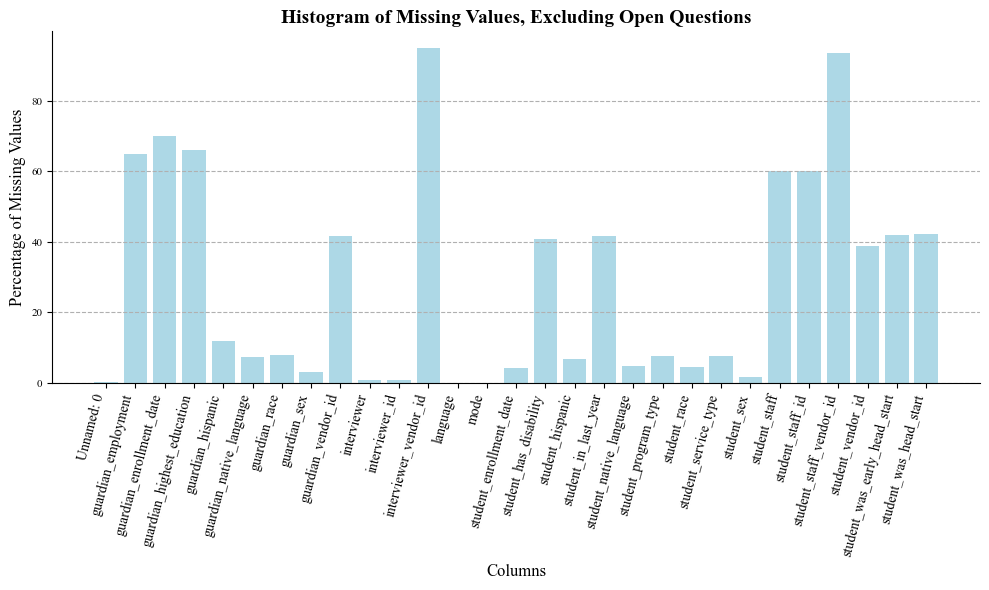

In [47]:
# Calculate the percentage of missing values
missing_percentage = (missing_count / len(df)) * 100

# Plotting the histogram
# Set up figure and axes
fig, ax = plt.subplots(figsize=(10, 6))

# Plotting the histogram
ax.bar(missing_percentage.index, missing_percentage.values, color='lightblue')

# Customize the appearance
ax.set_xlabel('Columns', fontsize=12, fontfamily='Times New Roman')
ax.set_ylabel('Percentage of Missing Values', fontsize=12, fontfamily='Times New Roman')
ax.set_title('Histogram of Missing Values, Excluding Open Questions', fontsize=14, fontweight='bold', fontfamily='Times New Roman')

# Adjusting x-axis labels rotation and font size
plt.xticks(rotation=75, ha='right', fontsize=10, fontfamily='Times New Roman')

# Adjusting y-axis tick label font size
plt.yticks(fontsize=8, fontfamily='Times New Roman')

# Add grid lines
ax.grid(axis='y', linestyle='--')

# Remove the top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Tweak the layout
fig.tight_layout()

# Show the plot
plt.show()

# DETAILED ANALYSIS OF VARIABLES

Here, we will look at some potential key variables and summarize their outcomes and issues.

## Guardian Employment

The results of the employment status of guardians participating in the Head Start Parent Gauge Interview program are as follows: the majority of the values (64.95%) are missing, indicating a significant data gap that needs to be filled for more accurate data analysis. Among the available data, 14.39% of the guardians are employed full time, 13.70% are neither employed nor in school, 4.70% are employed part-time, 1.30% are in school, 0.67% are both employed and in school, 0.19% refused to provide their employment status, and there are a few other miscellaneous values. To ensure the integrity and reliability of the analysis, it is crucial to address the missing values in the employment status column to obtain a comprehensive and representative dataset for further analysis and insights.

In [46]:
# Count the values of 'guardian_employment'
employment_counts = df['guardian_employment'].value_counts(dropna=False)
total_count = employment_counts.sum()

# Create a rich table
table = Table(title="Breakdown of Guardian Employment")
table.add_column("Employment", justify="left", style="bold cyan")
table.add_column("Count", justify="right", style="bold yellow")
table.add_column("Percentage", justify="right", style="bold green")

# Add rows to the table
for employment, count in employment_counts.items():
    if pd.isnull(employment):
        employment = "Missing"
    percentage = (count / total_count) * 100
    table.add_row(str(employment), str(count), f"{percentage:.2f}%")

# Display the table
console = Console()
console.print(table)

            Breakdown of Guardian Employment            
┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━━━━┓
┃ Employment                     ┃  Count ┃ Percentage ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━━━━┩
│ Missing                        │ 133062 │     64.95% │
│ Employed full time             │  29487 │     14.39% │
│ Neither employed nor in school │  28071 │     13.70% │
│ Employed part time             │   9635 │      4.70% │
│ In school                      │   2657 │      1.30% │
│ Both employed and in school    │   1370 │      0.67% │
│ Refused                        │    393 │      0.19% │
│ guardian_employment            │    204 │      0.10% │
└────────────────────────────────┴────────┴────────────┘

## Guardian Enrollment Date

We can observe that there are indeed irregular dates that need to be removed. We need to conduct an outlier analysis later.

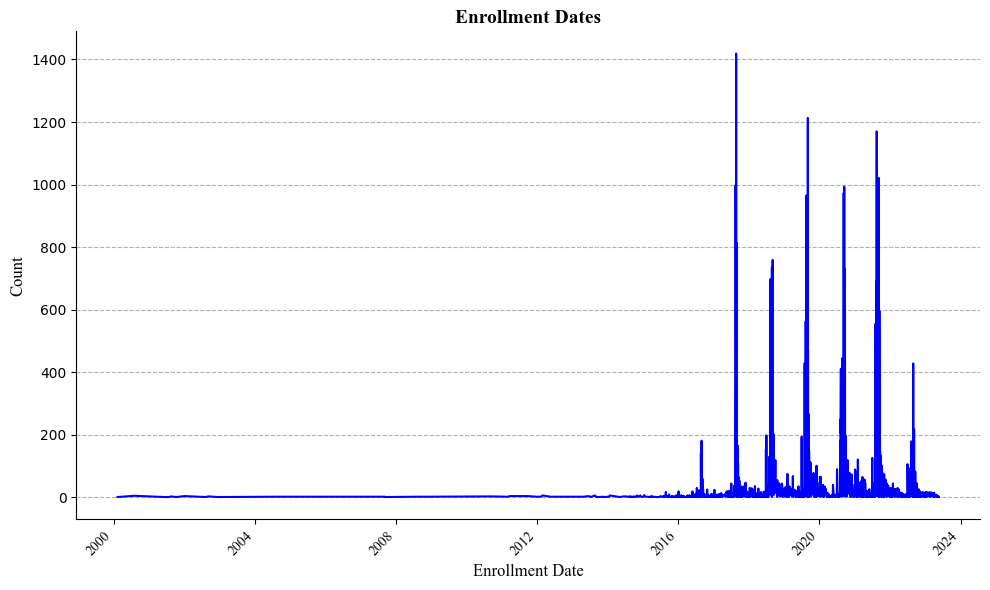

Omitted dates count: 143505


In [110]:
# Assuming 'df' is your DataFrame
enrollment_dates = df['guardian_enrollment_date']

# Count the total number of dates
total_count = len(enrollment_dates)

# Remove outlier dates
enrollment_dates = enrollment_dates[enrollment_dates.between('2000-01-01', '2023-06-13')]

# Calculate the count of omitted dates
omitted_count = total_count - len(enrollment_dates)

# Convert enrollment_dates to datetime with errors='coerce'
enrollment_dates = pd.to_datetime(enrollment_dates, errors='coerce')

# Remove NaT values
enrollment_dates = enrollment_dates.dropna()

# Count the occurrences by date
date_counts = enrollment_dates.value_counts().sort_index()

# Set up figure and axes
fig, ax = plt.subplots(figsize=(10, 6))

# Plotting the line plot
ax.plot(date_counts.index, date_counts.values, color='blue')

# Customize the appearance
ax.set_xlabel('Enrollment Date', fontsize=12, fontfamily='Times New Roman')
ax.set_ylabel('Count', fontsize=12, fontfamily='Times New Roman')
ax.set_title('Enrollment Dates', fontsize=14, fontweight='bold', fontfamily='Times New Roman')

# Rotating x-axis labels for better visibility
plt.xticks(rotation=45, ha='right', fontsize=10, fontfamily='Times New Roman')

# Add grid lines
ax.grid(axis='y', linestyle='--')

# Remove the top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Tweak the layout
fig.tight_layout()

# Show the plot
plt.show()

# Print the count of omitted dates
print("Omitted dates count:", omitted_count)


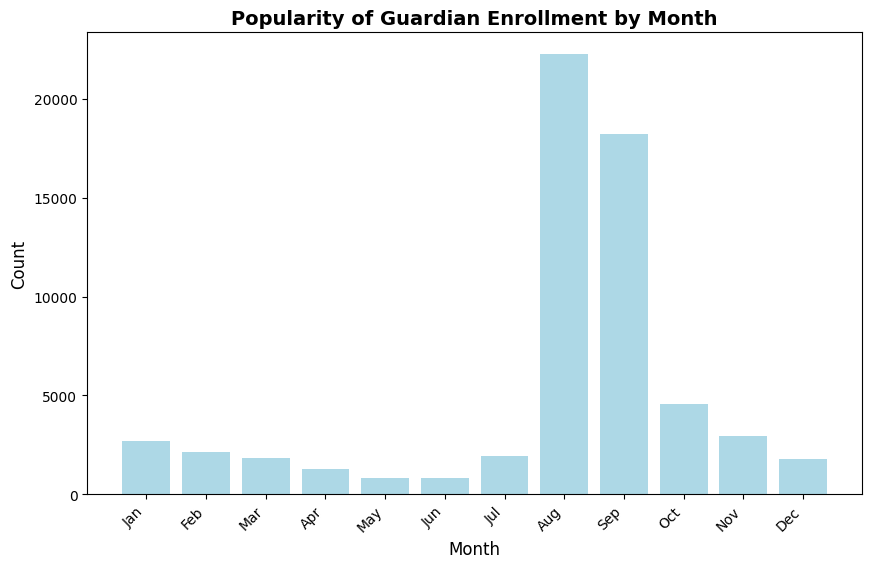

In [109]:
# Assuming 'df' is your DataFrame
enrollment_dates = pd.to_datetime(df['guardian_enrollment_date'])

# Extract the month from the enrollment_dates
enrollment_months = enrollment_dates.dt.month

# Count the occurrences of each month
month_counts = enrollment_months.value_counts().sort_index()

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(month_counts.index, month_counts.values, color='lightblue')

# Customize the appearance
plt.xlabel('Month', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Popularity of Guardian Enrollment by Month', fontsize=14, fontweight='bold')

# Set x-axis tick labels to month names
month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
plt.xticks(month_counts.index, month_names, fontsize=10, rotation=45, ha='right')

# Show the plot
plt.show()

## Guardian Highest Education

The results of the guardian highest education attainment show that a significant proportion of the values (66.03%) are missing, highlighting the need to address this data gap for more accurate analysis. Among the available data, the highest education attainment reported is as follows: 16.51% are high school graduates or completed their GED, 5.82% have some college credit but no degree, 5.14% completed 9th-12th grade without a diploma, 2.26% hold an associate degree, 1.89% have a bachelor's degree, 1.51% completed 8th grade or less, 0.44% hold a graduate or professional degree, and there are a few other miscellaneous values. It is important to note that parent or guardian educational attainment plays a significant role in child development, influencing various aspects such as academic achievement, socioeconomic status, and future opportunities. Therefore, it is crucial to gather accurate and complete data on guardian highest education to better understand the impact on the children involved in the study or program.

In [44]:
# Count the values of 'guardian_highest_education'
education_counts = df['guardian_highest_education'].value_counts(dropna=False)
total_count = education_counts.sum()

# Create a rich table
table = Table(title="Breakdown of Guardian Highest Education")
table.add_column("Education", justify="left", style="bold cyan")
table.add_column("Count", justify="right", style="bold yellow")
table.add_column("Percentage", justify="right", style="bold green")

# Add rows to the table
for education, count in education_counts.items():
    if pd.isnull(education):
        education = "Missing"
    percentage = (count / total_count) * 100
    table.add_row(str(education), str(count), f"{percentage:.2f}%")

# Display the table
console = Console()
console.print(table)

            Breakdown of Guardian Highest Education            
┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━━━━┓
┃ Education                             ┃  Count ┃ Percentage ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━━━━┩
│ Missing                               │ 135274 │     66.03% │
│ High school graduate or GED Completed │  33827 │     16.51% │
│ Some college credit but no degree     │  11923 │      5.82% │
│ 9th-12th grade, no diploma            │  10526 │      5.14% │
│ Associate degree (AA, AS)             │   4638 │      2.26% │
│ Bachelor's degree (BA, BS, AB)        │   3873 │      1.89% │
│ 8th grade or less                     │   3103 │      1.51% │
│ Graduate or professional degree       │    904 │      0.44% │
│ Refused                               │    607 │      0.30% │
│ guardian_highest_education            │    204 │      0.10% │
└───────────────────────────────────────┴────────┴────────────┘

## STUDENT DISABILITY STATUS

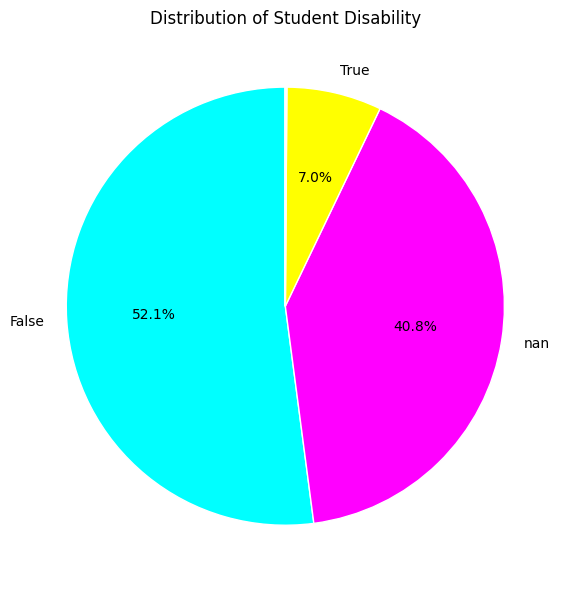

In [40]:
# Count the values of 'student_has_disability'
disability_counts = df['student_has_disability'].value_counts(dropna=False)

# Calculate percentages
percentages = disability_counts / disability_counts.sum() * 100

# Filter segments below 5% and keep the labels
filtered_labels = [label if percentage >= 5 else '' for label, percentage in zip(disability_counts.index, percentages)]

# Create a pie chart
plt.figure(figsize=(8, 6))
colors = ['cyan', 'magenta', 'yellow', 'gray']
_, _, autotexts = plt.pie(disability_counts.values, labels=filtered_labels, colors=colors, autopct='%1.1f%%',
                          startangle=90, wedgeprops=dict(edgecolor='white', linewidth=1))

# Add title
plt.title('Distribution of Student Disability')

# Hide labels for segments below 5%
for autotext, percentage in zip(autotexts, percentages):
    if percentage < 5:
        autotext.set_text('')

# Adjust spacing and aspect ratio
plt.tight_layout()
plt.gca().set_aspect('equal')

# Show the plot
plt.show()

## LANGUAGE OF INTERVIEW

The "Language" breakdown reveals the distribution of languages in the dataset. The majority of respondents indicated English as their language (86.39%), followed by Spanish (12.33%). Other languages include Middle Eastern & South Asian Languages (0.42%), African Languages (0.29%), East Asian Languages (0.27%), and various others. The dataset also includes some instances with missing or unspecified language values. 

In [25]:
# Count and percentage breakdown of values in 'language' variable
language_counts = df['language'].value_counts()
language_percentages = df['language'].value_counts(normalize=True) * 100

# Create a Rich Table for the breakdown
table = Table(title="Language breakdown")
table.add_column("Language", justify="left", style="cyan")
table.add_column("Count", justify="right", style="magenta")
table.add_column("Percentage", justify="right", style="green")

for language, count in language_counts.items():
    percentage = language_percentages[language]
    table.add_row(language, str(count), f"{percentage:.2f}%")

# Display the breakdown table
console = Console()
console.print(table)

                                                Language breakdown                                                 
┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━━━━┓
┃ Language                                                                                  ┃  Count ┃ Percentage ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━━━━┩
│ English                                                                                   │ 176982 │     86.39% │
│ Spanish                                                                                   │  25267 │     12.33% │
│ Middle Eastern & South Asian Languages (e.g., Arabic, Hebrew, Hindi, Urdu, Bengali)       │    861 │      0.42% │
│ African Languages (e.g., Swahili, Wolof)                                                  │    600 │      0.29% │
│ East Asian Languages (e.g., Chinese, Vietnamese, Tagalog)                                 │    549 │      0.27% │
│ language                                                                                  │    204 │      0.10% │
│ Native Central American, South American, and Mexican Languages (e.g., Mixteco, Quichean.) │    166 │      0.08% │
│ Other (e.g., American Sign Language)                                                      │    131 │      0.06% │
│ Caribbean Languages (e.g., Haitian-Creole, Patois)                                        │     72 │      0.04% │
│ European Languages                                                                        │     22 │      0.01% │
│ Unspecified (language is not known or parents declined identifying home language)         │     15 │      0.01% │
└───────────────────────────────────────────────────────────────────────────────────────────┴────────┴────────────┘

## DUPLICATE VALUE ANALYSIS

In this section, we shift our focus to analyzing duplicate values within our dataset. Duplicate values refer to instances where identical or highly similar rows or columns are present in the dataset. Identifying and addressing duplicate values is essential as they can distort our analyses and lead to misleading conclusions.

Our analysis will primarily focus on identifying duplicate rows and columns. Duplicate rows occur when multiple entries in the dataset share the same values across all or most of their attributes. Duplicate columns, on the other hand, refer to identical or highly similar column headers that contain redundant information.

By conducting a thorough examination, we aim to quantify the presence of duplicate values in our dataset. This analysis will help us understand the extent of the issue and provide insights into potential sources of duplication. Additionally, it will enable us to develop strategies to mitigate the impact of duplicate values and ensure the accuracy and integrity of our analyses.

Through this analysis, we have identified a total of 203 duplicate rows, which correspond to duplicate column headers. These duplicate rows can potentially introduce inconsistencies in our dataset and affect the reliability of our results. Therefore, addressing these duplicates is crucial to ensure the accuracy and validity of our analysis.

Let's proceed with our analysis and explore the strategies we can employ to handle these duplicate values effectively.

In [31]:
##output the number of duplicate rows
subset_columns = df.columns[2:]  # Exclude the first two columns from analysis
duplicate_count = df.duplicated(subset=subset_columns).sum()
print("Number of duplicate rows (excluding first two columns in determination):", duplicate_count)

#duplicate_rows = df[df.duplicated(subset=subset_columns)]
#sample_duplicate_rows = duplicate_rows.sample(n=1)

#print("Sample of a duplicate row:")
#print(sample_duplicate_rows)

Number of duplicate rows (excluding first two columns in determination): 203


## OUTLIER ANALYSIS

In this section, we delve into the analysis of outliers within our dataset. Outliers are data points that significantly deviate from the majority of the observations in a variable. Identifying and understanding outliers is essential as they can have a substantial impact on statistical analyses and modeling results.

Our analysis aims to detect and examine potential outliers in the dataset. By doing so, we can assess the extent of their presence and evaluate their influence on our analysis and decision-making processes. Understanding the nature and characteristics of outliers will allow us to make informed decisions on how to handle them appropriately.

Through this outlier analysis, we can gain valuable insights into the distribution and behavior of our data. We can identify potential errors or anomalies that may need further investigation and determine whether they should be treated as genuine outliers or if there are any data quality issues to be addressed.

Doingg this will ensure the reliability and accuracy of our analyses and prevent skewed or misleading results. Let's proceed with our outlier analysis to gain a deeper understanding of our dataset and determine the best approach to handle outliers in our analysis.

<Axes: xlabel='Q2'>

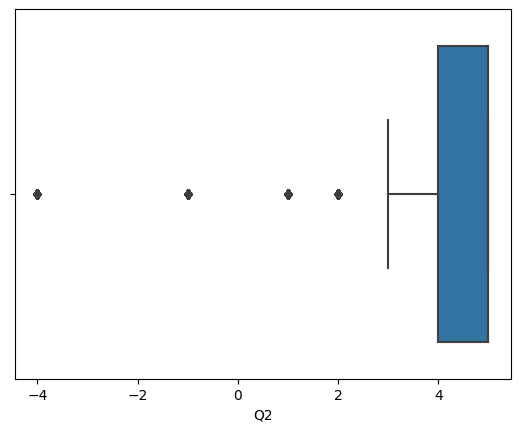

In [81]:
# Box plot
df['Q2'] = pd.to_numeric(df['Q2'], errors='coerce')

# Option 1: Remove NaN values
df = df.dropna(subset=['Q2'])

sns.boxplot(x=df['Q2'])

## Guardian Enrollment Date Outliers

There are many irregular dates that need to be removed.

In [108]:
# Assuming 'df' is your DataFrame
enrollment_dates = df['guardian_enrollment_date']

# Convert enrollment_dates to datetime if it's not already
enrollment_dates = pd.to_datetime(enrollment_dates)

# Extract the year from enrollment_dates
enrollment_years = enrollment_dates.dt.year.round(0)

# Calculate the count and percentage of values by year
year_counts = enrollment_years.value_counts().sort_index()
year_percentages = (year_counts / len(enrollment_years)) * 100

# Create a Rich Table for breakdown by year
table = Table(title="Guardian Enrollment Breakdown by Year")
table.add_column("Year", justify="left", style="bold cyan")
table.add_column("Count", justify="right", style="bold magenta")
table.add_column("Percentage", justify="right", style="bold green")

for year in year_counts.index:
    count = year_counts[year]
    percentage = year_percentages[year]
    table.add_row(str(int(year)), str(count), f"{percentage:.2f}%")

# Display the table
console = Console()
console.print(table)

Guardian Enrollment Breakdown
           by Year           
┏━━━━━━┳━━━━━━━┳━━━━━━━━━━━━┓
┃ Year ┃ Count ┃ Percentage ┃
┡━━━━━━╇━━━━━━━╇━━━━━━━━━━━━┩
│ 1915 │     1 │      0.00% │
│ 1921 │    67 │      0.03% │
│ 1923 │     1 │      0.00% │
│ 1976 │     4 │      0.00% │
│ 1979 │     9 │      0.00% │
│ 1980 │     4 │      0.00% │
│ 1981 │     3 │      0.00% │
│ 1983 │     1 │      0.00% │
│ 1984 │     1 │      0.00% │
│ 1985 │     2 │      0.00% │
│ 1986 │     8 │      0.00% │
│ 1987 │     5 │      0.00% │
│ 1988 │     5 │      0.00% │
│ 1989 │     6 │      0.00% │
│ 1990 │     1 │      0.00% │
│ 1991 │     5 │      0.00% │
│ 1993 │     4 │      0.00% │
│ 1994 │    11 │      0.01% │
│ 1995 │     4 │      0.00% │
│ 1996 │     1 │      0.00% │
│ 1997 │     4 │      0.00% │
│ 1998 │     3 │      0.00% │
│ 1999 │     3 │      0.00% │
│ 2000 │     6 │      0.00% │
│ 2001 │     8 │      0.00% │
│ 2002 │     9 │      0.00% │
│ 2004 │     2 │      0.00% │
│ 2007 │     5 │      0.00% │
│ 2008 │     6 │      0.00% │
│ 2010 │     3 │      0.00% │
│ 2011 │    12 │      0.01% │
│ 2012 │    18 │      0.01% │
│ 2013 │    24 │      0.01% │
│ 2014 │    61 │      0.03% │
│ 2015 │   188 │      0.09% │
│ 2016 │  1489 │      0.73% │
│ 2017 │  7161 │      3.50% │
│ 2018 │  9702 │      4.74% │
│ 2019 │ 11283 │      5.51% │
│ 2020 │ 12953 │      6.33% │
│ 2021 │ 12756 │      6.23% │
│ 2022 │  4963 │      2.42% │
│ 2023 │   557 │      0.27% │
│ 2028 │     4 │      0.00% │
│ 2029 │     4 │      0.00% │
│ 2030 │     2 │      0.00% │
│ 2048 │     4 │      0.00% │
│ 2091 │     1 │      0.00% │
│ 2107 │     1 │      0.00% │
│ 2108 │     3 │      0.00% │
└──────┴───────┴────────────┘

## INTERVIEW QUESTION ANALYSIS

stuff

## Open Interview Question Analysis

more stuff